# SVM for Competição ML @SBS/DAA - Edição 2023/2024

Goal: predict Injeção na rede (kWh)

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [67]:
%store -r data
%store -r data_test

In [68]:
print(data.columns)
print(data.shape)
print(data.info())

Index(['Data', 'Normal (kWh)', 'Horário Económico (kWh)', 'Autoconsumo (kWh)',
       'Injeção na rede (kWh)', 'dt', 'city_name', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'rain_1h',
       'clouds_all', 'weather_description', 'Mes', 'Hora', 'Estacao'],
      dtype='object')
(11016, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     11016 non-null  datetime64[ns]
 1   Normal (kWh)             11016 non-null  float64       
 2   Horário Económico (kWh)  11016 non-null  float64       
 3   Autoconsumo (kWh)        11016 non-null  float64       
 4   Injeção na rede (kWh)    11016 non-null  int64         
 5   dt                       11016 non-null  int64         
 6   city_name                11016 non-null  object        
 7   

In [69]:
print(data_test.columns)
print(data_test.shape)
print(data_test.info())

Index(['Data', 'Normal (kWh)', 'Horário Económico (kWh)', 'Autoconsumo (kWh)',
       'Injeção na rede (kWh)', 'dt', 'city_name', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'rain_1h',
       'clouds_all', 'weather_description', 'Mes', 'Hora', 'Estacao'],
      dtype='object')
(2256, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     2256 non-null   datetime64[ns]
 1   Normal (kWh)             2256 non-null   float64       
 2   Horário Económico (kWh)  2256 non-null   float64       
 3   Autoconsumo (kWh)        2256 non-null   float64       
 4   Injeção na rede (kWh)    0 non-null      float64       
 5   dt                       2256 non-null   int64         
 6   city_name                2256 non-null   object        
 7   tem

Drop columns that have low correlation with the label

In [70]:
data_dt   = data.copy()
data_dt_test = data_test.copy()
rem = ['dt','pressure','wind_speed','Mes','Hora','city_name','Data','rain_1h','clouds_all'] 
data_dt.drop(rem,axis=1,inplace=True)
data_dt_test.drop(rem ,axis=1,inplace=True)
nulls = False
def interpolate_linear(data_dt_test):
    data_dt_test['temp']                = data_dt_test['temp'].interpolate(method='linear')
    data_dt_test['feels_like']          = data_dt_test['feels_like'].interpolate(method='linear')
    data_dt_test['temp_min']            = data_dt_test['temp_min'].interpolate(method='linear')
    data_dt_test['temp_max']            = data_dt_test['temp_max'].interpolate(method='linear')
    data_dt_test['humidity']            = data_dt_test['humidity'].interpolate(method='linear')
    # data_dt_test['clouds_all']          = data_dt_test['clouds_all'].fillna(0)
    data_dt_test['weather_description'] = data_dt_test['weather_description'].interpolate(method='linear')

if nulls:
    interpolate_linear(data_dt_test)
data_dt.info()
data_dt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             11016 non-null  float64
 1   Horário Económico (kWh)  11016 non-null  float64
 2   Autoconsumo (kWh)        11016 non-null  float64
 3   Injeção na rede (kWh)    11016 non-null  int64  
 4   temp                     11016 non-null  float64
 5   feels_like               11016 non-null  float64
 6   temp_min                 11016 non-null  float64
 7   temp_max                 11016 non-null  float64
 8   humidity                 11016 non-null  int64  
 9   weather_description      11016 non-null  int64  
 10  Estacao                  11016 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 946.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 11 columns):
 #   Column                   

In [71]:
from sklearn.model_selection import train_test_split

def grafico_barras(data,atr,title,xlabel,ylabel):
    incidents_count = data[atr].value_counts()
    sns.set(style='darkgrid')
    sns.barplot(x=incidents_count.index, y=incidents_count.values)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()


X = data_dt.drop(['Injeção na rede (kWh)'],axis=1)
y = data_dt['Injeção na rede (kWh)'].to_frame()
random = 2021
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=random)

In [72]:
print("The shape of X %s. X_train has shape %s while X_test has shape %s" %(X.shape, X_train.shape, X_test.shape))
print("The shape of y %s. y_train has shape %s while y_test has shape %s" %(y.shape, y_train.shape, y_test.shape))

The shape of X (11016, 10). X_train has shape (8262, 10) while X_test has shape (2754, 10)
The shape of y (11016, 1). y_train has shape (8262, 1) while y_test has shape (2754, 1)


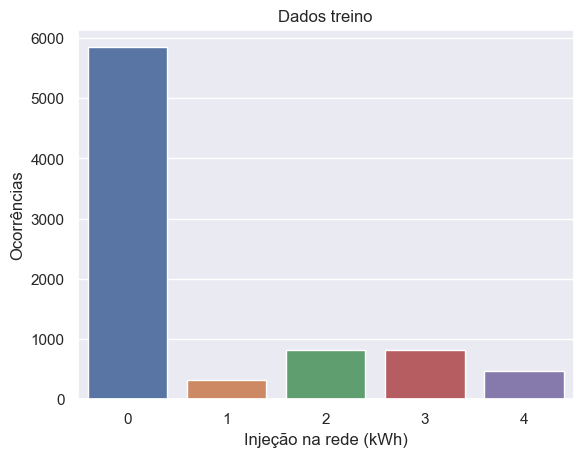

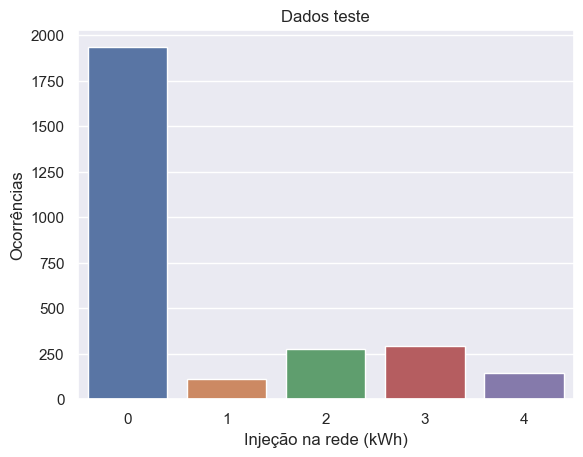

In [73]:
grafico_barras(y_train,'Injeção na rede (kWh)','Dados treino','Injeção na rede (kWh)','Ocorrências')
grafico_barras(y_test,'Injeção na rede (kWh)','Dados teste','Injeção na rede (kWh)','Ocorrências')

Let's make our model with 10 folds

In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [75]:
cross_valid_model = SVC(random_state=2021)
scores = cross_val_score(cross_valid_model, X,y,cv=10)
scores

c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

array([0.72413793, 0.70598911, 0.7123412 , 0.70961887, 0.72232305,
       0.71869328, 0.66212534, 0.72388738, 0.71662125, 0.71752952])

In [76]:
print("%0.2f accuracy with a standard deviation of %0.2f" %(scores.mean(),scores.std()))

0.71 accuracy with a standard deviation of 0.02


And now without Cross Validation:

In [77]:
from sklearn.svm import SVC

In [78]:

param_C = 1000
param_gamma = 0.0001
param_kernel = 'rbf'

# Create the SVC classifier with specified parameters
model_svm = SVC(probability=True, random_state=2021)


In [79]:
model_svm.fit(X_train,y_train)

c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(probability=True, random_state=2021)

### Predictions and evaluations

Let's predict using the trained model:

In [80]:
predictions = model_svm.predict(X_test)

In [81]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, ConfusionMatrixDisplay, accuracy_score

In [82]:
print("%0.2f accuracy" % (accuracy_score(y_test,predictions)))

0.71 accuracy


In [83]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.99      0.84      1933
           1       0.00      0.00      0.00       110
           2       0.00      0.00      0.00       276
           3       0.38      0.21      0.27       292
           4       0.00      0.00      0.00       143

    accuracy                           0.71      2754
   macro avg       0.22      0.24      0.22      2754
weighted avg       0.56      0.71      0.62      2754



c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[1908    0    0   25    0]
 [ 103    0    0    7    0]
 [ 246    0    0   30    0]
 [ 231    0    0   61    0]
 [ 106    0    0   37    0]]
0.714960058097313


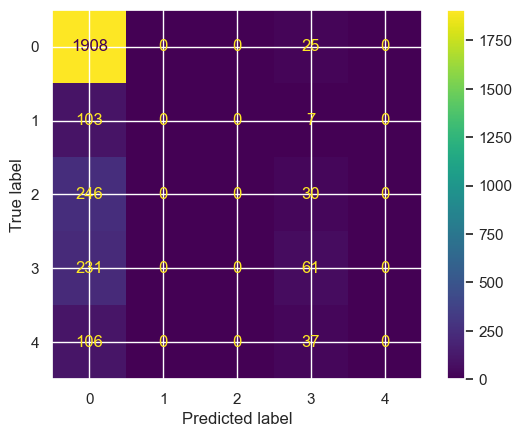

In [84]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

ConfusionMatrixDisplay.from_predictions(y_test,predictions)
plt.show()

### Trainning the model with GridSearchCV

Now its time to train the model with GridSearch for submission

In [85]:
X_train_submission = data_dt.drop(['Injeção na rede (kWh)'],axis=1)
y_train_submission = data_dt['Injeção na rede (kWh)'].to_frame()
X_test_submission = data_dt_test.drop(['Injeção na rede (kWh)'],axis=1)

print(X_train_submission.info())
print(X_test_submission.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             11016 non-null  float64
 1   Horário Económico (kWh)  11016 non-null  float64
 2   Autoconsumo (kWh)        11016 non-null  float64
 3   temp                     11016 non-null  float64
 4   feels_like               11016 non-null  float64
 5   temp_min                 11016 non-null  float64
 6   temp_max                 11016 non-null  float64
 7   humidity                 11016 non-null  int64  
 8   weather_description      11016 non-null  int64  
 9   Estacao                  11016 non-null  int64  
dtypes: float64(7), int64(3)
memory usage: 860.8 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------              

In [86]:
param_grid = {'C' : [0.1,1,10,100,1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel':['rbf']}

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
grid_svm = GridSearchCV(SVC(random_state=2021),param_grid,refit=True, verbose=3)

In [89]:
grid_svm.fit(X_train_submission,y_train_submission)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.706 total time=  14.3s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.706 total time=  14.2s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.706 total time=  13.8s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.706 total time=  14.8s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.706 total time=  14.8s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.706 total time=   5.1s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.706 total time=   4.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.706 total time=   5.2s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.706 total time=   4.7s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.706 total time=   5.3s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.719 total time=   3.4s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.707 total time=   3.8s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.709 total time=   3.4s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.674 total time=   3.4s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.720 total time=   4.0s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.716 total time=   3.5s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.708 total time=   3.3s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.719 total time=   3.0s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.678 total time=   2.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.717 total time=   3.1s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.709 total time=   2.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.708 total time=   2.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.717 total time=   2.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.716 total time=   2.8s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.706 total time=   2.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.705 total time=  13.8s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.706 total time=  13.7s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.705 total time=  14.6s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.704 total time=  13.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.706 total time=  13.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.715 total time=   4.8s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.689 total time=   4.7s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.674 total time=   4.7s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.628 total time=   4.7s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.729 total time=   5.0s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.716 total time=   3.1s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.696 total time=   3.1s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.715 total time=   3.2s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.662 total time=   3.1s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.729 total time=   3.2s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.720 total time=   2.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.710 total time=   3.1s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.709 total time=   3.0s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.684 total time=   2.8s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.723 total time=   3.0s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.715 total time=   2.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.710 total time=   2.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.722 total time=   2.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.689 total time=   2.8s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.714 total time=   3.0s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.698 total time=  15.1s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.701 total time=  14.8s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.697 total time=  15.1s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.688 total time=  14.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.704 total time=  15.4s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.711 total time=   4.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.655 total time=   4.7s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.622 total time=   4.7s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.580 total time=   4.7s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.725 total time=   4.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.779 total time=   3.1s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.719 total time=   3.1s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.736 total time=   3.1s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.676 total time=   3.0s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.774 total time=   3.2s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.763 total time=   2.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.739 total time=   2.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.741 total time=   2.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.707 total time=   2.8s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.764 total time=   3.0s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.717 total time=   3.0s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.714 total time=   3.0s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.725 total time=   3.1s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.693 total time=   2.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.720 total time=   3.0s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.697 total time=  14.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.701 total time=  14.7s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.697 total time=  15.2s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.688 total time=  15.2s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.704 total time=  15.4s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.703 total time=   4.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.650 total time=   4.8s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.624 total time=   4.7s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.569 total time=   4.7s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.700 total time=   5.0s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.790 total time=   3.8s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.724 total time=   3.7s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.745 total time=   3.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.699 total time=   3.5s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.776 total time=   4.0s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.818 total time=   2.7s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.785 total time=   2.8s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.789 total time=   2.7s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.773 total time=   2.6s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.816 total time=   2.8s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.788 total time=   3.0s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.774 total time=   2.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.753 total time=   3.0s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.728 total time=   2.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.778 total time=   3.0s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.697 total time=  14.8s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.701 total time=  15.5s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.697 total time=  15.5s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.688 total time=  15.1s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.704 total time=  15.1s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.701 total time=   4.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.653 total time=   4.7s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.619 total time=   4.7s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.566 total time=   5.3s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.704 total time=   4.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.775 total time=   7.6s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.703 total time=   7.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.732 total time=   7.6s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.678 total time=   7.6s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.768 total time=   7.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.816 total time=   4.1s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.780 total time=   4.1s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.788 total time=   4.1s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.788 total time=   3.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.823 total time=   4.3s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.821 total time=   2.8s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.804 total time=   2.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.808 total time=   2.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.792 total time=   2.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.825 total time=   2.9s


c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(estimator=SVC(random_state=2021),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [90]:
grid_svm.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [91]:
grid_svm.best_estimator_

SVC(C=1000, gamma=0.0001, random_state=2021)

In [92]:
grid_predictions = grid_svm.predict(X_test)

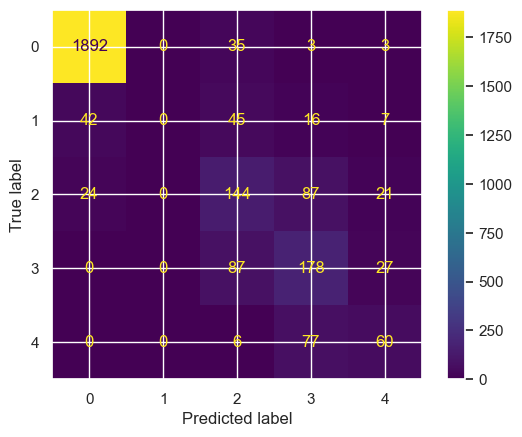

In [93]:
ConfusionMatrixDisplay.from_predictions(y_test, grid_predictions)
plt.show()

In [94]:
print(confusion_matrix(y_test, grid_predictions))
print(accuracy_score(y_test, grid_predictions))
print(classification_report(y_test,grid_predictions))

[[1892    0   35    3    3]
 [  42    0   45   16    7]
 [  24    0  144   87   21]
 [   0    0   87  178   27]
 [   0    0    6   77   60]]
0.8257080610021786
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1933
           1       0.00      0.00      0.00       110
           2       0.45      0.52      0.49       276
           3       0.49      0.61      0.55       292
           4       0.51      0.42      0.46       143

    accuracy                           0.83      2754
   macro avg       0.48      0.51      0.49      2754
weighted avg       0.80      0.83      0.81      2754



c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
predcsv = grid_svm.predict(X_test_submission)

row_ids = range(1, len(predcsv) + 1)

submission_df = pd.DataFrame({'RowId': row_ids, 'Result': predcsv})
replace_map = {'Result': {0:'None',1: 'Low', 2: 'Medium' ,3: 'High',4 : 'Very High' }}
submission_df.replace(replace_map,inplace=True)
submission_df.to_csv('grupo20_svm.csv', index=False)

In [96]:
%store model_svm
# %store grid_svm

Stored 'model_svm' (SVC)
